<a href="https://colab.research.google.com/github/Bibek04-bit/Flood-Forecasting/blob/main/Linear_regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np

In [50]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from zlib import crc32

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:

path_to_file = '/content/drive/MyDrive/Colab Notebooks/Flood_data_linear_reg.csv'
df = pd.read_csv(path_to_file)
print(df.head())

         Date  Daily flow Rate  Gauge height flow      NDVI  sm_top_0_10cm  \
0  2010-01-01              401               3.19  0.806800         12.728   
1  2010-01-02              397               3.18  0.805588         12.628   
2  2010-01-03              395               3.17  0.804375         12.533   
3  2010-01-04              390               3.16  0.803163         12.444   
4  2010-01-05              392               3.17  0.801950         12.356   

   sm_10_40cm  24h accumulated  Daily Max Temp  Daily Min Temp  Flood_Level  
0   41.205952              0.1            14.0             8.0            0  
1   40.953522              1.8            14.4            10.8            0  
2   40.707092              1.6            18.0            10.4            0  
3   40.467663              0.0            19.5             9.5            0  
4   40.249233              0.0            20.5            10.0            0  


In [40]:
import os

directory_path = '/content/drive/MyDrive/Colab Notebooks/'
try:
    files = os.listdir(directory_path)
    print(f"Files in '{directory_path}':")
    for file in files:
        print(file)
except FileNotFoundError:
    print(f"Error: Directory not found at '{directory_path}'")
except Exception as e:
    print(f"An error occurred: {e}")

Files in '/content/drive/MyDrive/Colab Notebooks/':
Untitled0.ipynb
day1.ipynb
Untitled1.ipynb
ml_class.ipynb
LinearRegression.ipynb
Karnali_data_trial.csv
karnali_flood_classified.csv
MP_label_test.ipynb
karnali_flood_classified.gsheet
Copy of karnali_flood_classified.gsheet
Flood_data_linear_reg.gsheet
Linear_regression.ipynb
Linear_regression_1.ipynb
Flood_data_linear_reg.csv


In [41]:
try:

    data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Flood_data_linear_reg.csv')
    print("--- Data Loaded Successfully ---")
    print(data.head())
    print(f"\nTotal rows: {len(data)}")
    print("-" * 30)

except FileNotFoundError:
    print("ERROR: Could not find '/content/drive/MyDrive/Colab Notebooks/Flood_data_linear_reg.csv'.")
    print("The script will now run with placeholder synthetic data for demonstration.")


    N = 200
    np.random.seed(42)
    data = pd.DataFrame({
        'Daily flow Rate': np.random.uniform(500, 5000, N),
        'Gauge height flow': np.random.uniform(5, 15, N),
        'NDVI': np.random.uniform(0.1, 0.9, N),
        'sm_top_0_10cm': np.random.uniform(0.15, 0.45, N),
        'sm_10_40cm': np.random.uniform(0.15, 0.45, N),
        '24h accumulated': np.random.uniform(0, 150, N),
        'Daily Max Temp': np.random.uniform(20, 35, N),
        'Daily Min Temp': np.random.uniform(10, 25, N),
    })
    data['Flood_Level'] = (
        0.005 * data['Daily flow Rate'] +
        2.5 * data['Gauge height flow'] +
        np.random.normal(0, 5, N)
    )
    data['Date'] = pd.to_datetime(pd.Series(pd.date_range('2018-01-01', periods=N, freq='D')))

--- Data Loaded Successfully ---
         Date  Daily flow Rate  Gauge height flow      NDVI  sm_top_0_10cm  \
0  2010-01-01              401               3.19  0.806800         12.728   
1  2010-01-02              397               3.18  0.805588         12.628   
2  2010-01-03              395               3.17  0.804375         12.533   
3  2010-01-04              390               3.16  0.803163         12.444   
4  2010-01-05              392               3.17  0.801950         12.356   

   sm_10_40cm  24h accumulated  Daily Max Temp  Daily Min Temp  Flood_Level  
0   41.205952              0.1            14.0             8.0            0  
1   40.953522              1.8            14.4            10.8            0  
2   40.707092              1.6            18.0            10.4            0  
3   40.467663              0.0            19.5             9.5            0  
4   40.249233              0.0            20.5            10.0            0  

Total rows: 3652
------------

In [44]:
TARGET_COLUMN = 'Flood_Level'
FEATURE_COLUMNS = [
    'Daily flow Rate', 'Gauge height flow', 'NDVI', 'sm_top_0_10cm',
    'sm_10_40cm', '24h accumulated', 'Daily Max Temp', 'Daily Min Temp'
]

In [45]:
min_val = data[TARGET_COLUMN].min()
max_val = data[TARGET_COLUMN].max()
bins = np.linspace(min_val, max_val, 6)

In [48]:
print("Flood Level Category Distribution in full dataset:")
print(data["flood_level_cat"].value_counts(normalize=True).sort_index())
print("-" * 30)

Flood Level Category Distribution in full dataset:
flood_level_cat
0    0.806134
1    0.190581
3    0.002738
4    0.000548
Name: proportion, dtype: float64
------------------------------


In [47]:
data['flood_level_cat'] = pd.cut(data[TARGET_COLUMN], bins=bins, labels=False, include_lowest=True)
display(data.head())

,Date,Daily flow Rate,Gauge height flow,NDVI,sm_top_0_10cm,sm_10_40cm,24h accumulated,Daily Max Temp,Daily Min Temp,Flood_Level,flood_level_cat
0,2010-01-01,401,3.19,0.806800,12.728,41.205952,0.1,14.0,8.0,0,0
1,2010-01-02,397,3.18,0.805588,12.628,40.953522,1.8,14.4,10.8,0,0
2,2010-01-03,395,3.17,0.804375,12.533,40.707092,1.6,18.0,10.4,0,0
3,2010-01-04,390,3.16,0.803163,12.444,40.467663,0.0,19.5,9.5,0,0
4,2010-01-05,392,3.17,0.801950,12.356,40.249233,0.0,20.5,10.0,0,0


In [51]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

In [52]:
for train_index, test_index in splitter.split(data, data["flood_level_cat"]):
    strat_train_set = data.iloc[train_index]
    strat_test_set = data.iloc[test_index]

In [53]:
X_train = strat_train_set[FEATURE_COLUMNS].values
y_train = strat_train_set[TARGET_COLUMN].values
X_test = strat_test_set[FEATURE_COLUMNS].values
y_test = strat_test_set[TARGET_COLUMN].values

In [54]:
print(f"Stratified Training samples: {len(X_train)}")
print(f"Stratified Testing samples: {len(X_test)}")
print("-" * 30)

Stratified Training samples: 2556
Stratified Testing samples: 1096
------------------------------


In [55]:
model = LinearRegression()
print("Starting Linear Regression model training...")
model.fit(X_train, y_train)
print("Model training complete.")
print("-" * 30)

Starting Linear Regression model training...
Model training complete.
------------------------------


In [56]:
y_pred = model.predict(X_test)

In [57]:
intercept = model.intercept_
coefficients = model.coef_

print("--- Learned Model Parameters (Stratified Split) ---")
print(f"Intercept (Baseline Flood Level): {intercept:.2f}")
print("\nFeature Coefficients (Impact on Flood_Level):")
for feature, coef in zip(FEATURE_COLUMNS, coefficients):
    print(f"- {feature:<20}: {coef:.4f}")
print("-" * 30)

--- Learned Model Parameters (Stratified Split) ---
Intercept (Baseline Flood Level): -0.35

Feature Coefficients (Impact on Flood_Level):
- Daily flow Rate     : 0.0002
- Gauge height flow   : 0.0465
- NDVI                : -0.0424
- sm_top_0_10cm       : -0.0044
- sm_10_40cm          : 0.0004
- 24h accumulated     : -0.0002
- Daily Max Temp      : 0.0082
- Daily Min Temp      : -0.0040
------------------------------


In [58]:
mse = mean_squared_error(y_test, y_pred)

In [59]:
r2 = r2_score(y_test, y_pred)

In [60]:
print("\n--- Model Performance on Test Data ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score (R2): {r2:.4f} (Closer to 1.0 is better)")
print("-" * 30)



--- Model Performance on Test Data ---
Mean Squared Error (MSE): 0.03
R-squared Score (R2): 0.8271 (Closer to 1.0 is better)
------------------------------


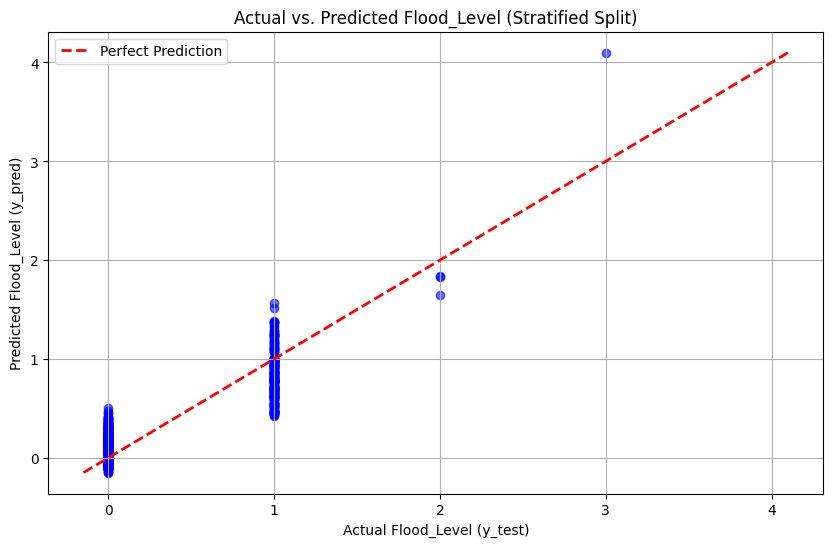

In [61]:
try:
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
    min_val_plot = min(min(y_test), min(y_pred))
    max_val_plot = max(max(y_test), max(y_pred))
    plt.plot([min_val_plot, max_val_plot], [min_val_plot, max_val_plot], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

    plt.title('Actual vs. Predicted Flood_Level (Stratified Split)')
    plt.xlabel('Actual Flood_Level (y_test)')
    plt.ylabel('Predicted Flood_Level (y_pred)')
    plt.legend()
    plt.grid(True)
    plt.show()

except ImportError:
    print("\nMatplotlib not found.")
